# Linear Regression Project & Classification Tree Homework: Part C - Classification

Discretize the last column "Chance of Admit" into three classes and
create a classification tree with training data. Test the tree with test data
and evaluate the results in Python.


In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import os

# Path to the CSV file containing the data to be used for this part of the assignment
path_to_data_file_csv: str = os.path.normpath(
    r".\data\part_b_linear_regression_data\admission_predict_ver1.1_small_data_set_for_linear_regression.csv"
)

# Load the CSV file into a pandas DataFrame
df = pd.read_csv(path_to_data_file_csv)

# Discretize the "Chance of Admit" column into three classes
df['Chance of Admit'] = pd.cut(
    df['Chance of Admit'],  # Column to discretize (continuous)
    bins=3,  # Number of bins to use for discretization
    labels=['Low', 'Medium', 'High']  # Labels for the three classes
)

# Split the data into training and testing sets
x_train: pd.DataFrame  # Training data (features) (80% of the data)
x_test: pd.DataFrame  # Testing data (features) (20% of the data)
y_train: pd.Series  # Training data (target) (80% of the data)
y_test: pd.Series  # Testing data (target) (20% of the data)
x_train, x_test, y_train, y_test = train_test_split(
    # Drop the target column from the training data (axis=1 means column)
    df.drop('Chance of Admit', axis=1),
    # Target column (Chance of Admit) for training data
    df['Chance of Admit'],
    # 20% of the data will be used for testing (80% for training)
    test_size=0.2,
    # Random seed for reproducibility of results (42 is arbitrary)
    random_state=42
)

# Create a DecisionTreeClassifier object
clf: DecisionTreeClassifier = DecisionTreeClassifier()

# Fit the classifier to the training data
clf.fit(x_train, y_train)  # No need to scale the data for decision trees

# Predict the classes of the testing data
y_pred: list = clf.predict(x_test)

# Evaluate the performance of the classifier
accuracy: float = accuracy_score(y_test, y_pred)

# Accuracy denotes the percentage of correct predictions
print('Accuracy:', accuracy)

Accuracy: 0.74


## Describe a few rules (3 to 5 valuable rules are sufficient). Which rules do you think are the most valuable?

A few valuable rules for working with the given file:

1. Always make a backup of the original file before making any changes to it.
   This ensures that you can always revert back to the original data if
   something goes wrong.
2. Check for missing values in the data and handle them appropriately.
   Missing values can cause errors in the analysis and can lead to
   incorrect conclusions.
3. Normalize the data if necessary. Normalization can help to improve the
   performance of some machine learning algorithms by ensuring that all
   features are on the same scale.
4. Split the data into training and testing sets before building any models.
   This helps to ensure that the model is not over-fitting to the training data
   and can generalize well to new data.
5. Evaluate the performance of the model using appropriate metrics.
   Different models may require different evaluation metrics,
   so it's important to choose the right metric for the task at hand.

I think the most valuable rules are 2, 4, and 5. Handling missing values,
splitting the data into training and testing sets, and evaluating the
performance of the model are all critical steps in the data analysis process.
These steps help to ensure that the analysis is accurate, reliable, and
can be generalized to new data.


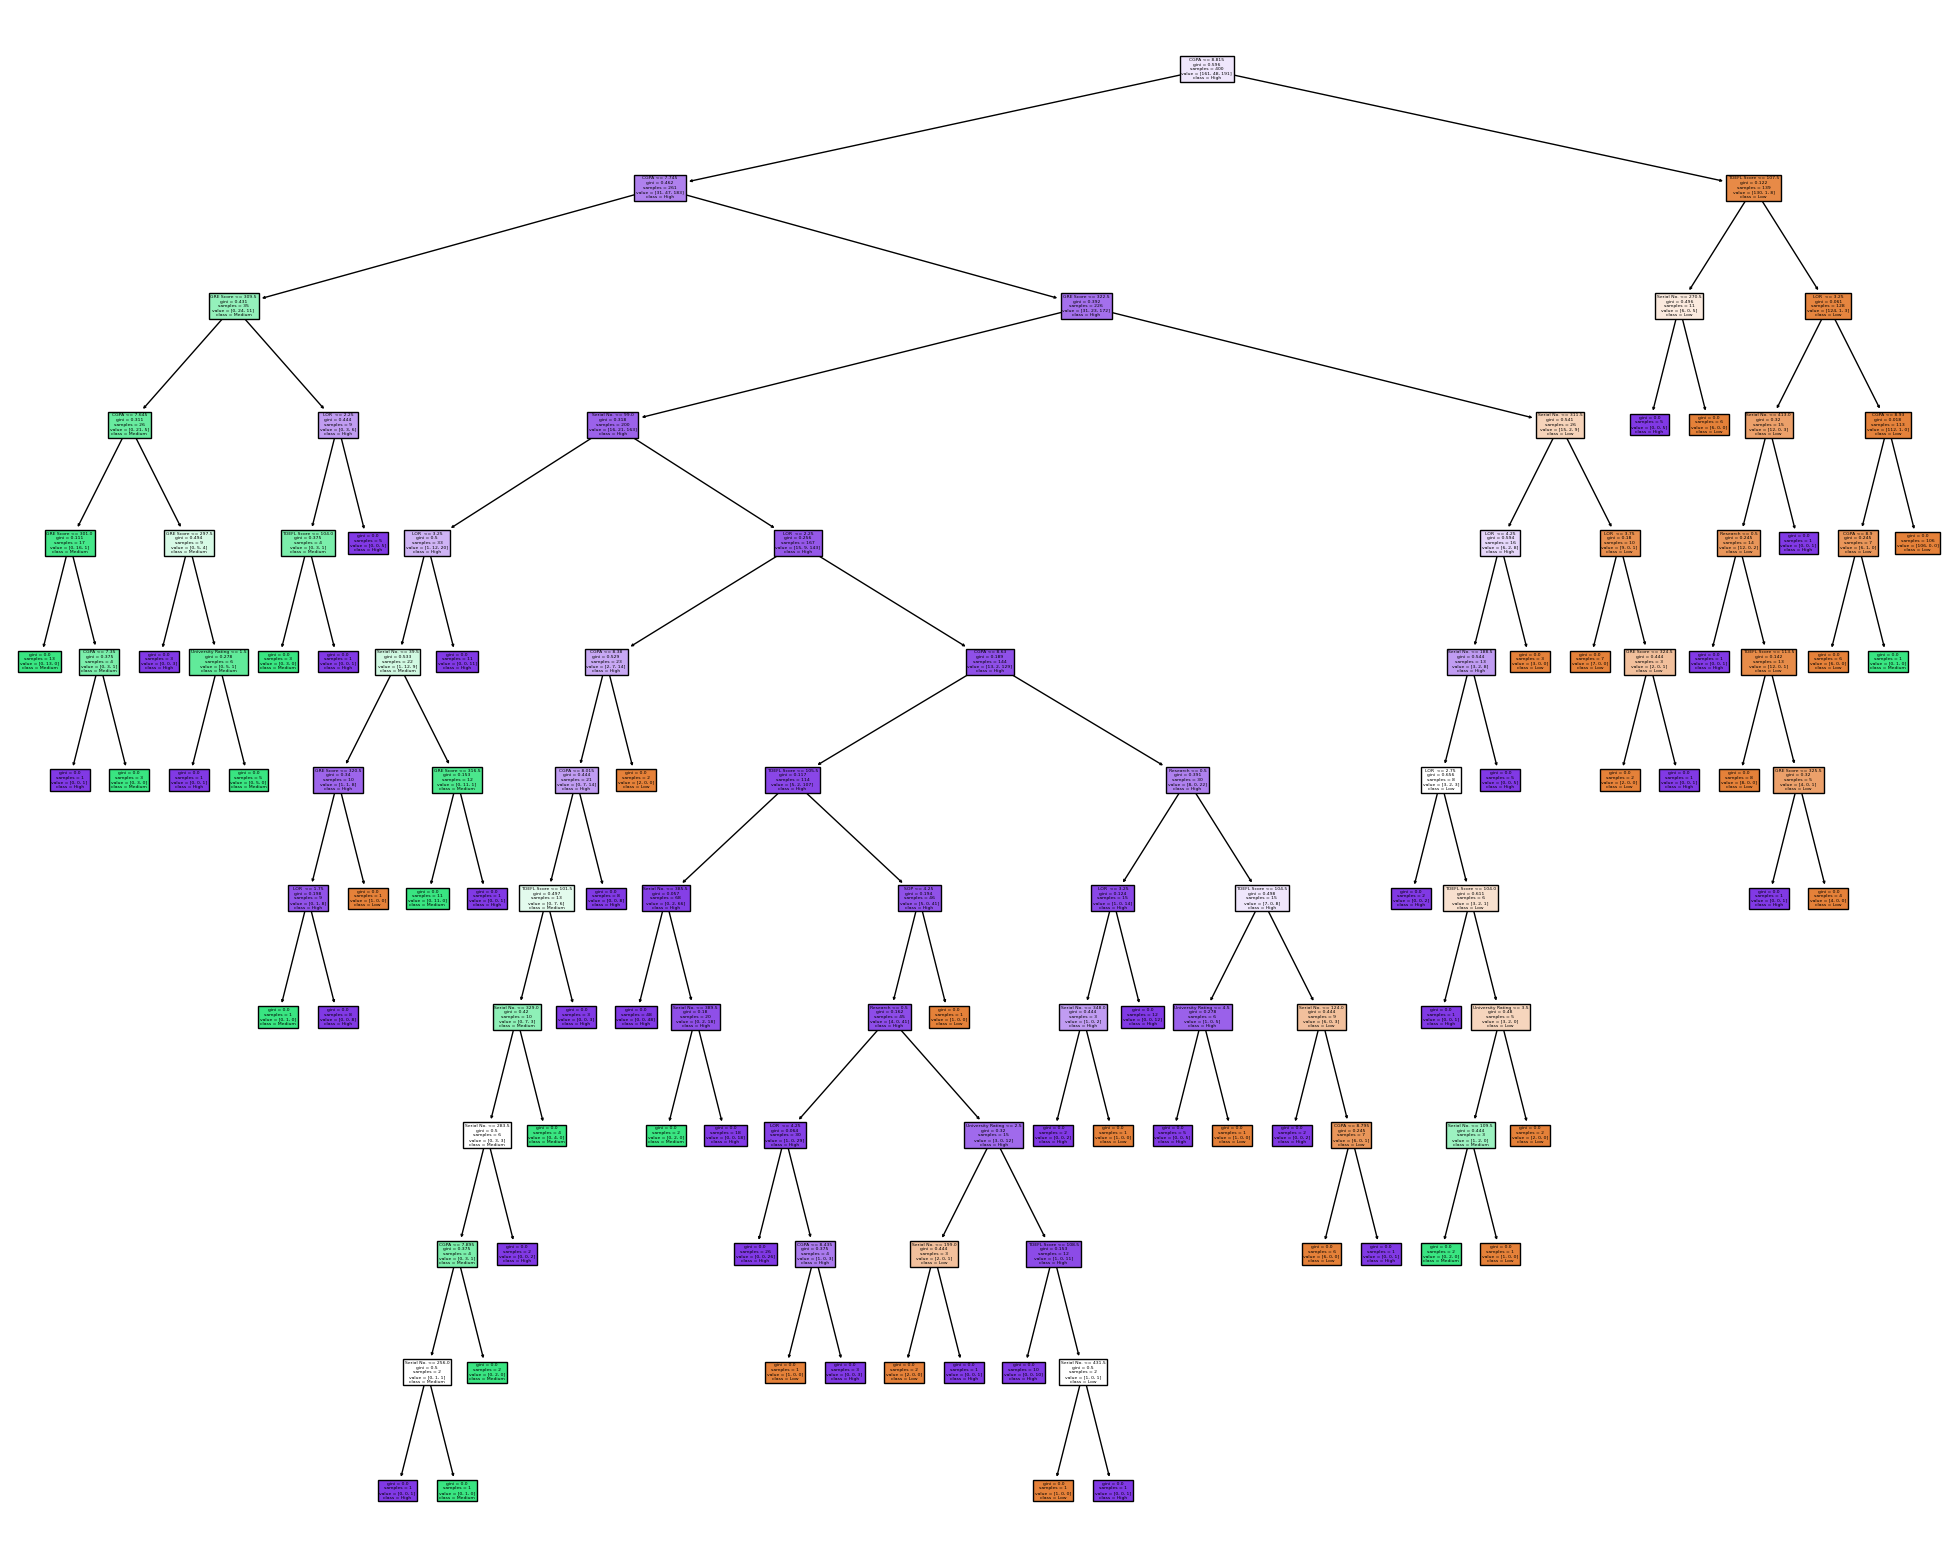

In [34]:
# Plot the decision tree in full resolution (600 dpi) in a PDF file
from sklearn import tree
import matplotlib.pyplot as plt
import os

# Is close to the resolution of a 4K monitor (3840x2160)
fig = plt.figure(figsize=(25, 20))

_ = tree.plot_tree(
    clf,
    feature_names=x_train.columns,
    class_names=['Low', 'Medium', 'High'],
    filled=True
)  # Underscore is used to suppress the output of the function call

# Save the figure to a PDF file in the data folder of the project directory
fig.savefig(os.path.normpath(r'.\data\part_c_decision_tree.pdf'), dpi=600)